In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score

In [2]:
#Leemos el dataset \n",
df = pd.read_excel("../data/regression_data.xls")

In [3]:
#Mostramos la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [5]:
#Ahora vamos a eliminar las columnas que no nos sirven para el análisis, que son id y date\n",
df.drop(["id","date"],axis=1,inplace=True)
#ahora mostramos el dataset sin las columnas 
print(df)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131     3.0           0     0   
21593         4       2.50         2310      5813     2.0           0     0   
21594         2       0.75         1020      1350     2.0           0     0   
21595         3       2.50         1600      2388     2.0           0     0   
21596         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [6]:
#Ahora hay ciertas columnas que se muestran como float y son int, entonces vamos a transformarlas a int
df["bathrooms"] = df["bathrooms"].astype(int)
df["floors"] = df["floors"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  int32  
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  int32  
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  price 

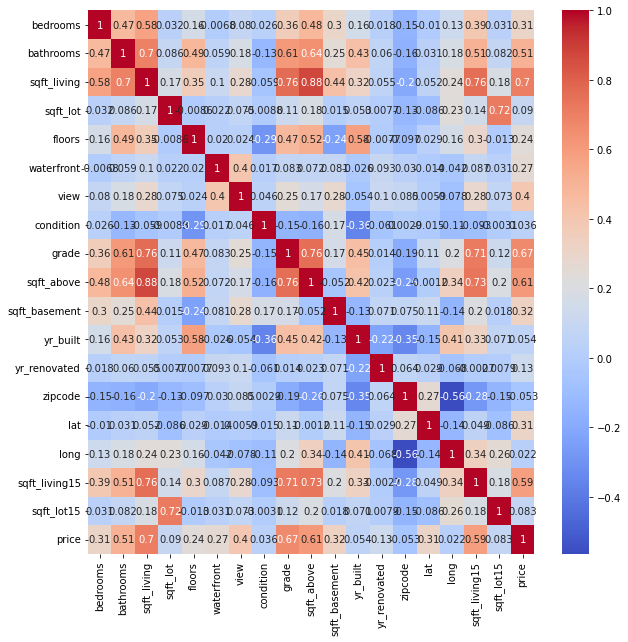

<Figure size 432x288 with 0 Axes>

In [7]:
#Ahora vamos a hacer una matriz de correlaciones para ver que columnas están más correlacionadas con el precio
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()
#Guardamos la imagen
plt.savefig("../images/correlaciónvariables_precio_.png")

In [8]:
#Ahora vamos a crear un Dataset nuevo
df.to_csv("../data/regression_nuevo.csv", index = False)

In [9]:
#Ahora vamos a crear un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
    
x = df.drop("price",axis=1)
y = df["price"]

In [10]:
#Ahora vamos a dividir el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
#Ahora normalizamos los datos
pt = PowerTransformer()
pt.fit(x_train)
with open("../scalers/scalers.plk","wb") as f:
    pickle.dump(pt, f)

c:\Users\Claudia\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
c:\Users\Claudia\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
c:\Users\Claudia\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Claudia\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3206: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
c:\Users\Claudia\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [12]:
#Normalizamos los datos para que se asmejen a una distribución normal
x_train_scaled = pt.transform(x_train)
x_test_scaled = pt.transform(x_test)

y_train_scaled = np.log(y_train)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

x_train_scaled 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.621559,0.471914,0.516355,-0.145987,-0.846871,-0.088318,-0.328077,-0.597428,0.391971,0.898328,-0.804485,1.489208,-0.208363,0.0,1.222973,1.378967,0.013085,-0.135167
1,0.720876,1.540455,1.210997,0.894678,1.130987,11.322770,3.049483,-0.597428,1.802264,1.507382,-0.804485,0.980316,-0.208363,0.0,-0.480799,-0.194629,0.620302,0.740969
2,-0.365635,0.471914,-0.234236,-0.088281,1.130987,-0.088318,-0.328077,-0.597428,0.391971,0.186139,-0.804485,0.763719,-0.208363,0.0,-1.838886,-0.664525,-0.138826,-0.071263
3,0.720876,0.471914,-0.051686,0.180333,-0.846871,-0.088318,3.049236,-0.597428,-0.511867,0.364784,-0.804485,0.090518,-0.208363,0.0,-2.095266,1.501881,-0.156281,0.145397
4,4.133359,1.540455,0.943122,0.586917,-0.846871,-0.088318,-0.328077,-0.597428,-0.511867,1.277947,-0.804485,-0.526153,-0.208363,0.0,-0.651012,0.106748,-0.721922,-0.527416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,-0.365635,0.471914,0.362676,-0.301394,1.130987,-0.088318,-0.328077,-0.597428,-0.511867,0.757240,-0.804485,1.205970,-0.208363,0.0,-0.347005,2.448502,0.542247,-0.242336
15113,0.720876,0.471914,0.875570,-0.819295,1.130987,-0.088318,-0.328077,-0.597428,0.391971,1.219027,-0.804485,1.685876,-0.208363,0.0,-0.557599,-0.090894,-0.087170,-0.345176
15114,0.720876,-1.100858,-0.521699,0.211993,-0.846871,-0.088318,-0.328077,0.999597,-1.610524,-0.102558,-0.804485,0.053785,-0.208363,0.0,0.587661,2.083881,-0.636222,0.189407
15115,-3.148455,-3.981188,-3.717430,0.757916,-0.846871,-0.088318,-0.328077,-0.597428,-2.984197,-4.021189,-0.804485,-0.396990,-0.208363,0.0,-0.682678,-0.780829,-1.499065,0.859885


In [13]:
#Ahora vamos a crear el modelo de regresión lineal\n",
lr = LinearRegression()
lr.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [14]:
#Ahora vamos a predecir los datos
y_pred = lr.predict(x_test_scaled)

In [15]:
#Ahora vamos a calcular el R2
r2_score(y_test, np.exp(y_pred))
#Calculando el R2, hemos obtenido un valor bajo debido a que el modelo no es muy bueno, y tiene mucho error.

0.6953856641693288

In [16]:
#Ahora vamos a guardar el modelo
with open("../models/modelo_regresion.plk","wb") as f:
    pickle.dump(lr, f)

No handles with labels found to put in legend.


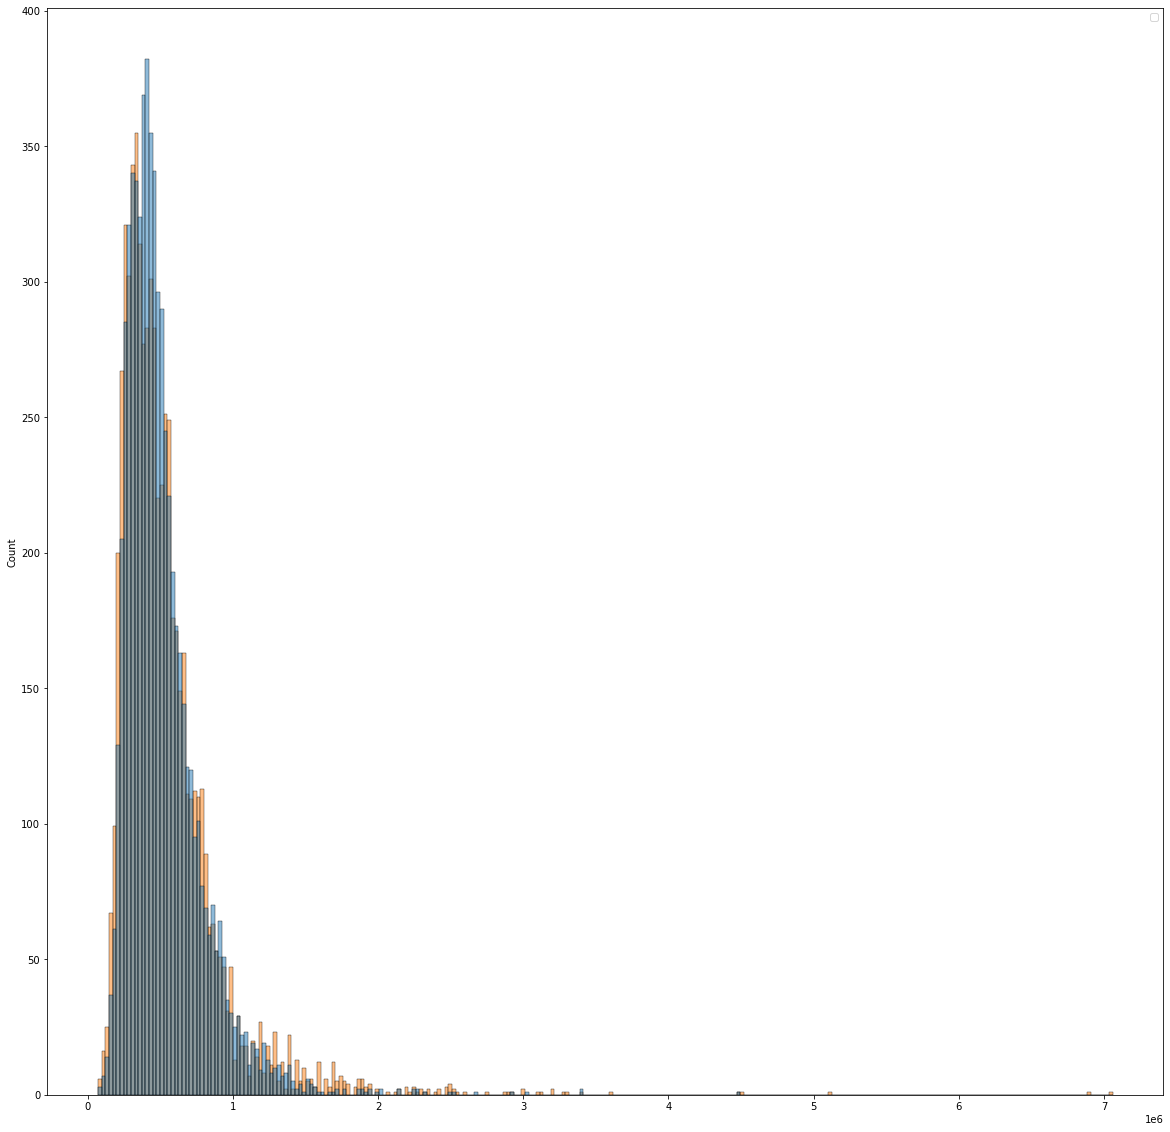

<Figure size 432x288 with 0 Axes>

In [17]:
#Ahora vamos a hacer un histograma de los datos reales y los datos predichos
plt.figure(figsize=(20,20))
sns.histplot([np.exp(y_pred), y_test])
plt.legend()
plt.show()
#Guardamos la imagen
plt.savefig("../images/histograma_datos_reales_predichos.png")

In [18]:
#comprender qué factores son responsables del mayor valor de la propiedad: $ 650K y más.
#Vamos a ver que columnas tienen una correlación mayor a 0.5 con el precio ya que si tine una correlación mayor a 0.5 es porque tiene una relación lineal con el precio, en otras palabras al tener dicha correlacion significa que el precio aumenta con dicha columna ya que como mencionamos anteriormente tiene una relación lineal con el precio, que significa que si aumenta una columna el precio aumenta y si disminuye la columna el precio disminuye.
corr[corr['price'] > 0.5]['price']

bathrooms        0.510631
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
price            1.000000
Name: price, dtype: float64